# HEATMAPS for comparison of Vision and MLM

In [1]:
%load_ext autoreload
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore')
import os
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.backend_bases
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mudata import MuData
import mudata

import tarfile
import warnings
from glob import glob

import anndata
import muon as mu
import pandas as pd
import scanpy as sc

from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_1samp

In [2]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['darkblue', 'blue', 'lightblue', '#FFEA00', 'orange', 'red', 'darkred']
cust = LinearSegmentedColormap.from_list('custom_cmap', colors)
colormap = cust

colors_katha = ['#33378F', '#669AC7', '#BFE0EC', '#FDF8C0', '#FBBC6C', '#EB5638', '#A71D2B']
cust_katha = LinearSegmentedColormap.from_list('custom_cmap', colors_katha)

## Heatmaps

In [3]:
vision_time = pd.read_csv('Data/Vision_scores_over_time_specific_cells.csv')
del vision_time['Unnamed: 0']
vision_time.set_index('pathway', inplace=True)
vision_time.index = vision_time.index.str.upper()

vision_leiden = pd.read_csv('Data/Vision_scores_over_d14_specific_cells_leiden.csv')
del vision_leiden['Unnamed: 0']
vision_leiden.set_index('pathway', inplace=True)
vision_leiden.index = vision_leiden.index.str.upper()
del vision_leiden['7']
del vision_leiden['8']
del vision_leiden['11']
del vision_leiden['12']
del vision_leiden['13']

vision_cite = pd.read_csv('Data/Vision_scores_over_d14_specific_cells_Cite.csv')
del vision_cite['Unnamed: 0']
vision_cite.set_index('pathway', inplace=True)
vision_cite.index = vision_cite.index.str.upper()

In [4]:
vision_leiden_all = pd.read_csv('Data/Vision_scores_over_all_specific_cells_leiden.csv')
del vision_leiden_all['Unnamed: 0']
vision_leiden_all.set_index('pathway', inplace=True)
vision_leiden_all.index = vision_leiden_all.index.str.upper()
del vision_leiden_all['7']
del vision_leiden_all['8']
del vision_leiden_all['11']
del vision_leiden_all['12']
del vision_leiden_all['13']

vision_cite_all = pd.read_csv('Data/Vision_scores_over_all_specific_cells_Cite.csv')
del vision_cite_all['Unnamed: 0']
vision_cite_all.set_index('pathway', inplace=True)
vision_cite_all.index = vision_cite_all.index.str.upper()

In [5]:
#generate df for time with zscore
zscore_time = vision_time.apply(lambda row: zscore(row), axis=1)
#zscore_time.to_csv('./Vision_time_zscore.csv')

#generate df for leiden
#zscore_leiden = vision_leiden.apply(lambda row: zscore(row), axis=1)
#zscore_leiden.to_csv('./Vision_leiden_zscore.csv')

#generate df for cite
#zscore_cite = vision_cite.apply(lambda row: zscore(row), axis=1)
#zscore_cite.to_csv('./Vision_cite_zscore.csv')

In [6]:
#generate df for leiden all
zscore_leiden_all = vision_leiden_all.apply(lambda row: zscore(row), axis=1)
#zscore_leiden_all.to_csv('./Vision_leiden_all_zscore.csv')

#generate df for cite all
zscore_cite_all = vision_cite_all.apply(lambda row: zscore(row), axis=1)
#zscore_cite_all.to_csv('./Vision_cite_all_zscore.csv')

In [7]:
selected = pd.read_csv('Datasets_Vision/selected_pathways_Mimi_final.csv', header=None)[0]
selected

0                                      QUIESCENCE
1                                   KEGG_RIBOSOME
2                        GOBP_RIBOSOME_BIOGENESIS
3                   GOBP_TRANSLATIONAL_ELONGATION
4                   GOBP_TRANSLATIONAL_INITIATION
5                       KEGG_BASE_EXCISION_REPAIR
6                  KEGG_OXIDATIVE_PHOSPHORYLATION
7                 KEGG_GLYCOLYSIS_GLUCONEOGENESIS
8                  KEGG_PENTOSE_PHOSPHATE_PATHWAY
9                                 KEGG_PROTEASOME
10                                 KEGG_APOPTOSIS
11                    GOBP_T_CELL_DIFFERENTIATION
12                         GOBP_T_CELL_ACTIVATION
13          KEGG_REGULATION_OF_ACTIN_CYTOSKELETON
14                      GOBP_T_CELL_PROLIFERATION
15                                  IFN_SIGNALING
16                                   CYTOTOXICITY
17    KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION
Name: 0, dtype: object

In [8]:
idx = [x for x in selected if x in zscore_time.index]
zscore_time_selected   = zscore_time.loc[idx]
#zscore_leiden_selected = zscore_leiden.loc[idx]
#zscore_cite_selected   = zscore_cite.loc[idx]

In [9]:
zscore_leiden_all_selected = zscore_leiden_all.loc[idx]
zscore_cite_all_selected   = zscore_cite_all.loc[idx]

In [10]:
new_order = ['10', '4', '9', '3', '5', '1', '2', '6', '0']
#zscore_leiden_selected = zscore_leiden_selected[new_order]
zscore_leiden_all_selected = zscore_leiden_all_selected[new_order]

In [11]:
selected_suppl = pd.read_csv('Datasets_Vision/selected_pathways_Mimi_Supplement_final.csv', header=None)[0]
selected_suppl

scores = []
for i in selected_suppl:
    value = vision_time.loc[str(i)].mean()
    scores.append(value)
    
scores = pd.DataFrame(scores)
scores.index = selected_suppl
scores

,0
0,
METHIONINE_CYCLE,1.354528
GOBP_CELLULAR_RESPONSE_TO_RETINOIC_ACID,0.250345
KEGG_PURINE_METABOLISM,3.359351
KEGG_CYSTEINE_AND_METHIONINE_METABOLISM,2.498278
POLYAMINE_SYNTHESIS,-1.355421
KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS,0.883511
GOBP_NADH_METABOLIC_PROCESS,3.131742
GOBP_NAD_METABOLIC_PROCESS,1.326928
GOBP_FATTY_ACID_BETA_OXIDATION,1.764126


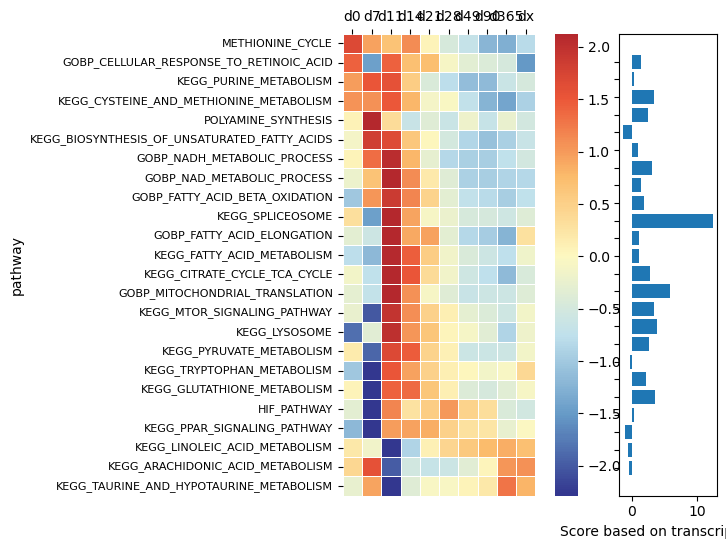

In [12]:
#Supplement Figure
idx = [x for x in selected_suppl if x in zscore_time.index]
zscore_time_selected_suppl   = zscore_time.loc[idx]
zscore_leiden_all_selected_suppl = zscore_leiden_all.loc[idx]
zscore_cite_all_selected_suppl   = zscore_cite_all.loc[idx]

fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(8, 6),
    gridspec_kw={'width_ratios':[4, 1]},
    constrained_layout=False
)

# --- HEATMAP (links) ---
sb.heatmap(
    zscore_time_selected_suppl,
    cmap=cust_katha,
    center=0,
    linewidths=0.5,
    square=True,
    robust=True,
    cbar=True,
    ax=ax0,
    yticklabels=list(zscore_time_selected_suppl.index)
)
ax0.xaxis.tick_top()
ax0.tick_params(axis='y', labelleft=True, labelsize=8)

# --- BARPLOT (rechts) ---
y_pos = np.arange(len(zscore_time_selected_suppl)) +1
ax1.barh(y_pos, scores[0].values, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([])    
ax1.set_xlabel("Score based on transcript level") 
ax1.invert_yaxis()


fig.subplots_adjust(wspace=0.02, left=0.28)
plt.savefig("heatmap_time_selected_score_Supplement.pdf", format="pdf", bbox_inches="tight")
plt.show()

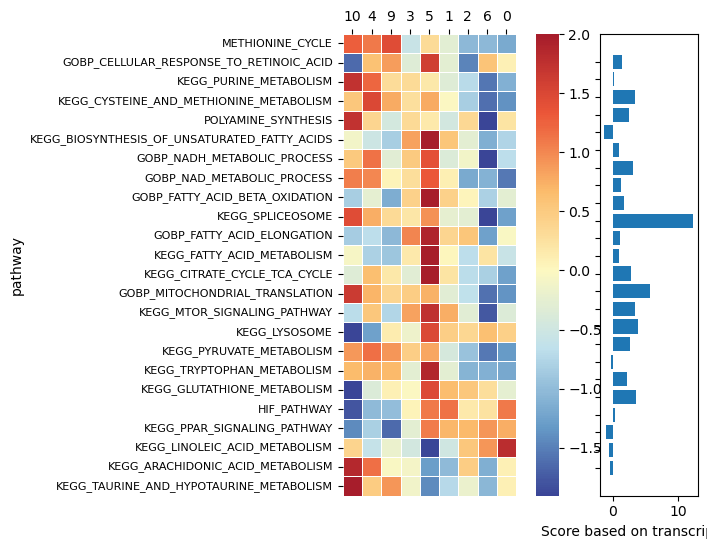

In [15]:
new_order = ['10', '4', '9', '3', '5', '1', '2', '6', '0']
zscore_leiden_all_selected_suppl = zscore_leiden_all_selected_suppl[new_order]



fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(8, 6),
    gridspec_kw={'width_ratios':[4, 1]},
    constrained_layout=False
)

# --- HEATMAP (links) ---
sb.heatmap(
    zscore_leiden_all_selected_suppl,
    cmap=cust_katha,
    center=0,
    linewidths=0.5,
    square=True,
    robust=True,
    cbar=True,
    ax=ax0,
    yticklabels=list(zscore_time_selected_suppl.index)
)
ax0.xaxis.tick_top()
ax0.tick_params(axis='y', labelleft=True, labelsize=8)

# --- BARPLOT (rechts) ---
y_pos = np.arange(len(zscore_time_selected_suppl)) +1
ax1.barh(y_pos, scores[0].values, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([])    
ax1.set_xlabel("Score based on transcript level") 
ax1.invert_yaxis()


fig.subplots_adjust(wspace=0.02, left=0.28)
plt.savefig("heatmap_leiden_selected_score_Supplement.pdf", format="pdf", bbox_inches="tight")
plt.show()

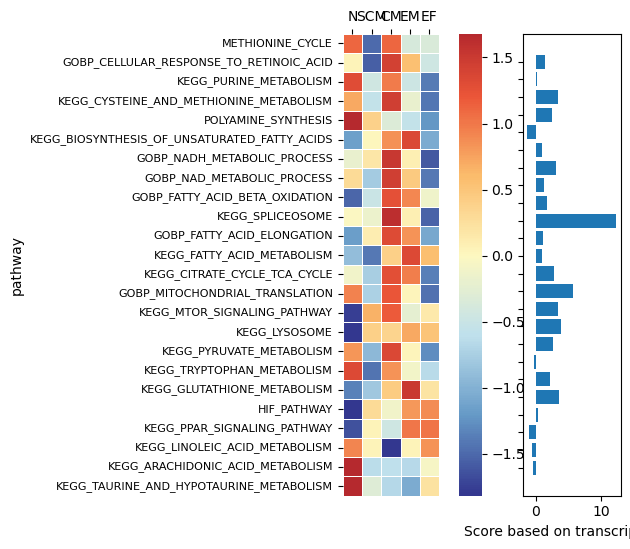

In [17]:

fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(8, 6),
    gridspec_kw={'width_ratios':[4, 1]},
    constrained_layout=False
)

# --- HEATMAP (links) ---
sb.heatmap(
    zscore_cite_all_selected_suppl,
    cmap=cust_katha,
    center=0,
    linewidths=0.5,
    square=True,
    robust=True,
    cbar=True,
    ax=ax0,
    yticklabels=list(zscore_cite_all_selected_suppl.index)
)
ax0.xaxis.tick_top()
ax0.tick_params(axis='y', labelleft=True, labelsize=8)

# --- BARPLOT (rechts) ---
y_pos = np.arange(len(zscore_cite_all_selected_suppl)) +1
ax1.barh(y_pos, scores[0].values, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([])    
ax1.set_xlabel("Score based on transcript level") 
ax1.invert_yaxis()


fig.subplots_adjust(wspace=0.02, left=0.28)
plt.savefig("heatmap_cite_selected_score_Supplement.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [19]:
#use whole list of own pathways to see what is significantly changed
selected = pd.read_csv('Datasets_Vision/selected_pathways_Mimi_final.csv', header=None)[0]
selected

scores = []
for i in selected:
    value = vision_time.loc[str(i)].mean()
    scores.append(value)
    
scores = pd.DataFrame(scores)
scores.index = selected
scores

,0
0,
QUIESCENCE,13.157286
KEGG_RIBOSOME,57.408259
GOBP_RIBOSOME_BIOGENESIS,21.240496
GOBP_TRANSLATIONAL_ELONGATION,9.746554
GOBP_TRANSLATIONAL_INITIATION,12.109990
KEGG_BASE_EXCISION_REPAIR,2.268170
KEGG_OXIDATIVE_PHOSPHORYLATION,22.278578
KEGG_GLYCOLYSIS_GLUCONEOGENESIS,4.108914
KEGG_PENTOSE_PHOSPHATE_PATHWAY,1.912747


In [20]:
idx = [x for x in selected if x in zscore_time.index]
zscore_time_selected   = zscore_time.loc[idx]
zscore_leiden_all_selected = zscore_leiden_all.loc[idx]
zscore_cite_all_selected   = zscore_cite_all.loc[idx]

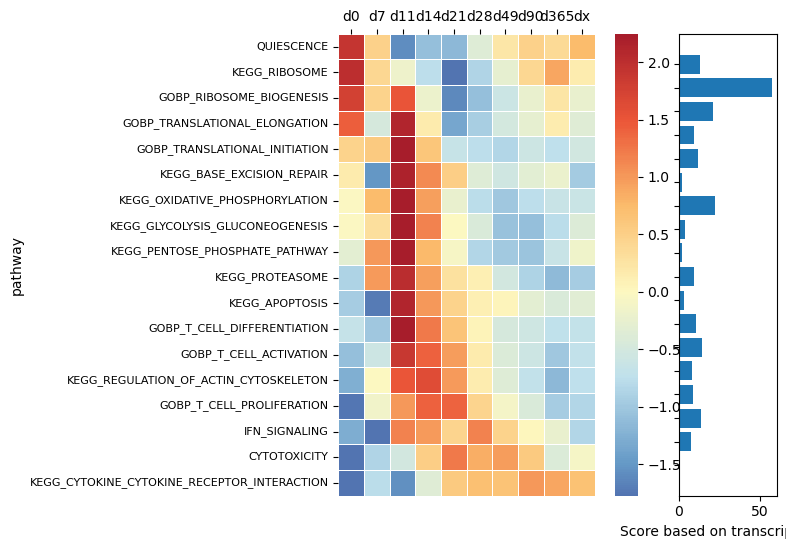

In [21]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(8, 6),
    gridspec_kw={'width_ratios':[4, 1]},
    constrained_layout=False
)

# --- HEATMAP (links) ---
sb.heatmap(
    zscore_time_selected,
    cmap=cust_katha,
    center=0,
    linewidths=0.5,
    square=True,
    robust=True,
    cbar=True,
    ax=ax0,
    yticklabels=list(zscore_time_selected.index)
)
ax0.xaxis.tick_top()
ax0.tick_params(axis='y', labelleft=True, labelsize=8)

# --- BARPLOT (rechts) ---
y_pos = np.arange(len(zscore_time_selected)) +1
ax1.barh(y_pos, scores[0].values, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([])    
ax1.set_xlabel("Score based on transcript level") 
ax1.invert_yaxis()


fig.subplots_adjust(wspace=0.02, left=0.28)
plt.savefig("heatmap_time_selected_score.pdf", format="pdf", bbox_inches="tight")
plt.show()

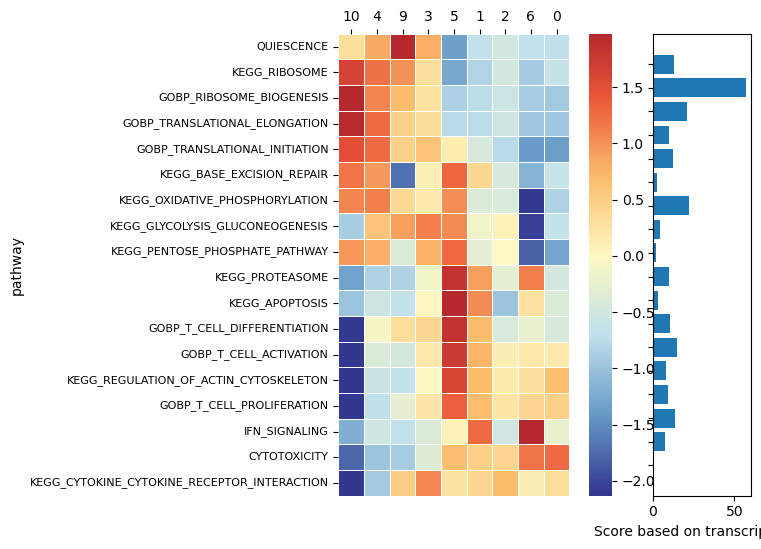

In [23]:
new_order = ['10', '4', '9', '3', '5', '1', '2', '6', '0']
zscore_leiden_all_selected = zscore_leiden_all_selected[new_order]


fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(8, 6),
    gridspec_kw={'width_ratios':[4, 1]},
    constrained_layout=False
)

# --- HEATMAP (links) ---
sb.heatmap(
    zscore_leiden_all_selected,
    cmap=cust_katha,
    center=0,
    linewidths=0.5,
    square=True,
    robust=True,
    cbar=True,
    ax=ax0,
    yticklabels=list(zscore_time_selected.index)
)
ax0.xaxis.tick_top()
ax0.tick_params(axis='y', labelleft=True, labelsize=8)

# --- BARPLOT (rechts) ---
y_pos = np.arange(len(zscore_time_selected)) +1
ax1.barh(y_pos, scores[0].values, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([])    
ax1.set_xlabel("Score based on transcript level") 
ax1.invert_yaxis()


fig.subplots_adjust(wspace=0.02, left=0.28)
plt.savefig("heatmap_leiden_all_selected_score.pdf", format="pdf", bbox_inches="tight")
plt.show()

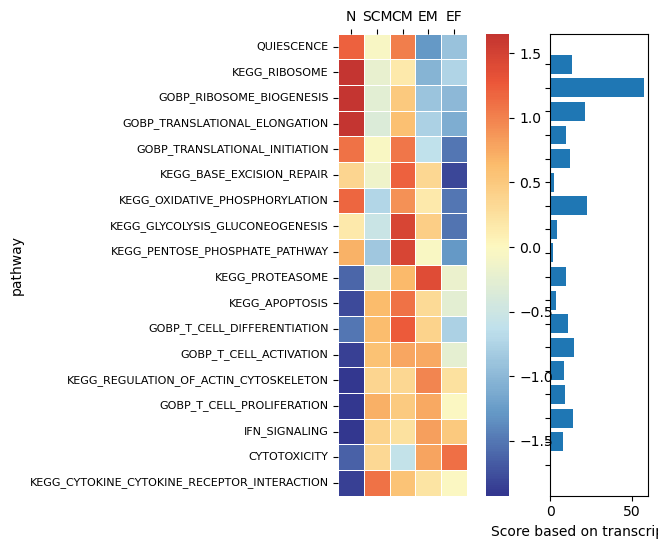

In [25]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(8, 6),
    gridspec_kw={'width_ratios':[4, 1]},
    constrained_layout=False
)

# --- HEATMAP (links) ---
sb.heatmap(
    zscore_cite_all_selected,
    cmap=cust_katha,
    center=0,
    linewidths=0.5,
    square=True,
    robust=True,
    cbar=True,
    ax=ax0,
    yticklabels=list(zscore_time_selected.index)
)
ax0.xaxis.tick_top()
ax0.tick_params(axis='y', labelleft=True, labelsize=8)

# --- BARPLOT (rechts) ---
y_pos = np.arange(len(zscore_time_selected)) +1
ax1.barh(y_pos, scores[0].values, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([])    
ax1.set_xlabel("Score based on transcript level") 
ax1.invert_yaxis()


fig.subplots_adjust(wspace=0.02, left=0.28)
plt.savefig("heatmap_cite_all_selected_score.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Stats

In [69]:
df = pd.read_csv('Data/VISION_scores_short.csv', sep=';')

remove cells that are neither NS4B214 nor no_binding and cells that belong to cluster 7, 8, 11, 12, 13 and remove immune scores etc that we don't use anymore aferwards

In [29]:
selected = pd.read_csv('./selected_pathways.csv', header=None)

In [30]:
selected = [x.lower() for x in selected[0].to_list()]
len(selected)

166

In [31]:
to_remove = ['gocc_mitochondrion', 
             'gobp_respiratory_electron_transport_chain', 
             'gobp_nad_biosynthesis_via_nicotinamide_riboside_salvage_pathway', 
             'gocc_ribosomal_subunit', 
             'gocc_cytosolic_ribosome', 
             'fatty_acid_synthesis', 
             'mevalonate_pathway', 
             'pi3k-akt-mtor-myc_signaling']

selected = [x for x in selected if x not in to_remove]
len(selected)

158

In [32]:
df2 = df[(df['specific_new'].isin(['no_binding', 'NS4B214'])) & (df['leiden'].isin([0, 1, 2, 3, 4, 5, 6, 9, 10]))]

In [33]:
del df2['Unnamed: 0']

In [34]:
cols = ['time', 'specific_new', 'FACS_Phenotype_v3', 'leiden'] + selected
df2 = df2[cols]

#### General scores
Compare all unspecific and specific of all pathways and then add significance stars if possible to the heatmap

In [415]:
results = {}

for pw in selected:
    spezifisch = df2[df2["specific_new"] == "NS4B214"][pw]
    unspezifisch = df2[df2["specific_new"] == "no_binding"][pw]
    t_stat, p_val = ttest_ind(spezifisch, unspezifisch, equal_var=False)
    results[pw] = {"t_stat": t_stat, "p_val": p_val}

results_df = pd.DataFrame(results).T
print(results_df)

                                t_stat         p_val
aminoacid_uptake             -0.786579  4.315457e-01
apoptosis                    13.139935  3.889604e-39
arginine-proline_metabolism   1.871907  6.124780e-02
cytotoxicity                  8.974134  3.186349e-19
glutamine_catabolism          0.226659  8.206933e-01
...                                ...           ...
kegg_vegf_signaling_pathway  11.502286  1.981550e-30
kegg_wnt_signaling_pathway   10.038185  1.341846e-23
methionine_cycle              2.608954  9.094834e-03
polyamine_synthesis          -2.687863  7.202603e-03
quiescence                   -4.166178  3.122536e-05

[158 rows x 2 columns]


In [417]:
# correcting for multiple testing
pvals = np.array(results_df['p_val'])

# FDR-Korrektur
rej, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')
results_df['p_val_corrected'] = pvals_corrected
results_df['significant'] = rej

In [419]:
group_means = df2.drop(columns = ['time', 'FACS_Phenotype_v3', 'leiden']).groupby("specific_new").mean()
results_df['mean_specific'] = group_means.loc['NS4B214', results_df.index].values
results_df['mean_unspecific'] = group_means.loc['no_binding', results_df.index].values
results_df['mean_change'] = results_df['mean_specific'] / results_df['mean_unspecific']
results_df

,t_stat,p_val,p_val_corrected,significant,mean_specific,mean_unspecific,mean_change
aminoacid_uptake,-0.786579,4.315457e-01,4.607042e-01,False,0.207582,0.221027,0.939170
apoptosis,13.139935,3.889604e-39,2.458230e-38,True,2.287329,2.005489,1.140534
arginine-proline_metabolism,1.871907,6.124780e-02,7.997647e-02,False,0.742552,0.713097,1.041305
cytotoxicity,8.974134,3.186349e-19,1.118763e-18,True,8.861150,8.302064,1.067343
glutamine_catabolism,0.226659,8.206933e-01,8.312151e-01,False,0.606345,0.601751,1.007634
...,...,...,...,...,...,...,...
kegg_vegf_signaling_pathway,11.502286,1.981550e-30,9.783905e-30,True,3.252873,3.006089,1.082094
kegg_wnt_signaling_pathway,10.038185,1.341846e-23,5.579254e-23,True,3.686796,3.483114,1.058477
methionine_cycle,2.608954,9.094834e-03,1.294580e-02,True,1.281334,1.232945,1.039247
polyamine_synthesis,-2.687863,7.202603e-03,1.044047e-02,True,-1.483209,-1.414809,1.048346


In [420]:
results_df.to_csv('./Vision/Stats_specific_vs_unspecific.csv') #all from heatmap are significant!

#### specific cells at all individual time points oxphos vs glycolyse

In [452]:
results = {}

for i in df2['time'].unique():
    oxphos = df2[(df2["specific_new"] == "NS4B214") & (df2["time"] == i)]["kegg_oxidative_phosphorylation"]
    glycolyse = df2[(df2["specific_new"] == "NS4B214") & (df2["time"] == i)]['kegg_glycolysis_gluconeogenesis']
    t_stat, p_val = ttest_ind(oxphos, glycolyse, equal_var=False)
    ox_mean = oxphos.mean()
    gly_mean = glycolyse.mean()
    change = ox_mean / gly_mean
    results[i] = {"t_stat": t_stat, "p_val": p_val, "mean_ox": ox_mean, "mean_glyco": gly_mean, "change": change}

results_specific_df = pd.DataFrame(results).T

# correcting for multiple testing
pvals = np.array(results_specific_df['p_val'])

# FDR-Korrektur
rej, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')
results_specific_df['p_val_corrected'] = pvals_corrected
results_specific_df['significant'] = rej

results_specific_df

,t_stat,p_val,mean_ox,mean_glyco,change,p_val_corrected,significant
d28,228.266268,0.000000e+00,20.994381,3.978257,5.277281,0.000000e+00,True
d7,12.176065,5.605794e-05,23.529677,4.200498,5.601639,5.605794e-05,True
d11,36.209737,5.821323e-46,26.188602,4.799184,5.456887,6.468137e-46,True
d21,229.195763,0.000000e+00,21.912720,4.104948,5.338124,0.000000e+00,True
d14,108.373930,0.000000e+00,23.851685,4.456807,5.351743,0.000000e+00,True
d49,182.905280,0.000000e+00,20.592076,3.792969,5.429013,0.000000e+00,True
d365,146.857027,0.000000e+00,21.213263,3.878406,5.469583,0.000000e+00,True
dx,74.043758,2.931166e-180,21.258017,3.989853,5.328021,4.187380e-180,True
d90,193.838746,0.000000e+00,21.017646,3.784910,5.553011,0.000000e+00,True
d0,42.672193,1.412926e-50,22.227716,4.103310,5.417021,1.766158e-50,True


In [449]:
results = {}

for i in ['d0', 'd7', 'd11', 'd14', 'd21', 'd28', 'd49', 'd90', 'd365', 'dx']:
    oxphos = df2[(df2["specific_new"] == "no_binding") & (df2["time"] == i)]["kegg_oxidative_phosphorylation"]
    glycolyse = df2[(df2["specific_new"] == "no_binding") & (df2["time"] == i)]['kegg_glycolysis_gluconeogenesis']
    t_stat, p_val = ttest_ind(oxphos, glycolyse, equal_var=False)
    ox_mean = oxphos.mean()
    gly_mean = glycolyse.mean()
    change = ox_mean / gly_mean
    results[i] = {"t_stat": t_stat, "p_val": p_val, "mean_ox": ox_mean, "mean_glyco": gly_mean, "change": change}

results_df = pd.DataFrame(results).T

# correcting for multiple testing
pvals = np.array(results_df['p_val'])

# FDR-Korrektur
rej, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')
results_df['p_val_corrected'] = pvals_corrected
results_df['significant'] = rej

results_df

,t_stat,p_val,mean_ox,mean_glyco,change,p_val_corrected,significant
d0,140.208813,0.0,21.556567,4.003566,5.384341,0.0,True
d7,291.252434,0.0,21.085583,3.908970,5.394153,0.0,True
d11,248.185872,0.0,21.135207,3.848719,5.491491,0.0,True
d14,343.237703,0.0,21.320081,3.920724,5.437791,0.0,True
d21,231.566329,0.0,21.293977,4.033391,5.279423,0.0,True
d28,192.652639,0.0,21.042193,3.976056,5.292227,0.0,True
d49,107.311727,0.0,20.839002,3.800683,5.482963,0.0,True
d90,247.235676,0.0,20.686991,3.796874,5.448426,0.0,True
d365,321.699535,0.0,21.450249,4.038732,5.311135,0.0,True
dx,241.964016,0.0,21.707970,4.004920,5.420325,0.0,True


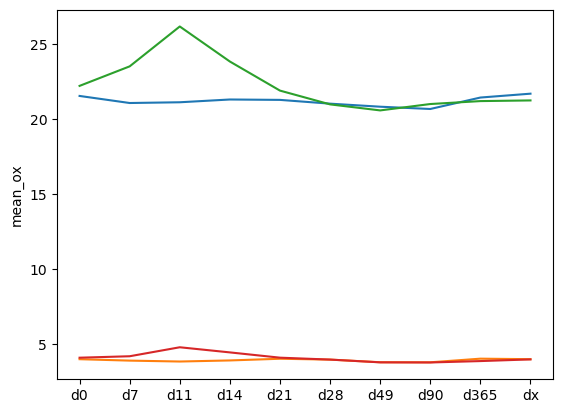

In [495]:
sb.lineplot(results_df['mean_ox'])
sb.lineplot(results_df['mean_glyco'])
sb.lineplot(results_specific_df['mean_ox'])
sb.lineplot(results_specific_df['mean_glyco'])
plt.savefig('./Vision/OXGLY_plot.pdf')
plt.show()

In [491]:
order = ['d0', 'd7', 'd11', 'd14', 'd21', 'd28', 'd49', 'd90', 'd365', 'dx']

df2["time"] = pd.Categorical(df2["time"], categories=order, ordered=True)


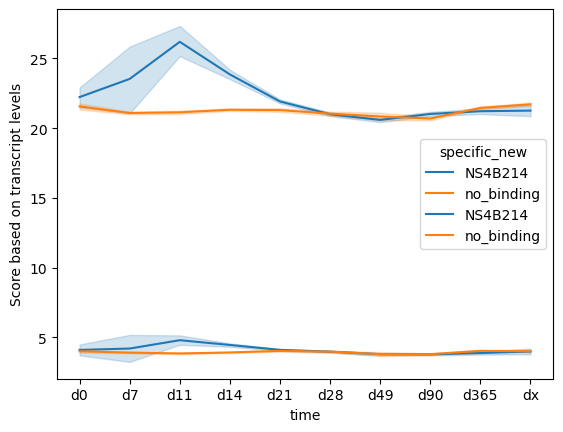

In [496]:
sb.lineplot(x = df2["time"], y = df2["kegg_oxidative_phosphorylation"], hue=df2['specific_new'])
sb.lineplot(x = df2["time"], y = df2["kegg_glycolysis_gluconeogenesis"], hue=df2['specific_new'])
plt.ylabel('Score based on transcript levels')
plt.savefig('./Vision/OXGLY_plot_sd.pdf')
plt.show()